In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import scipy
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Set the style
sns.set_style("white")

In [2]:
# Load the data
# I was getting all the headers as rows instead of columns so had to play around a bit

df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',
                        header=4, # Sets the header
                        skipfooter = 3,
                        warn_bad_lines = True,
                        skip_blank_lines = True,
                        engine='python')
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [3]:
# Do two things to start the data cleaning - set the city as our index as it's the only categorical
# And change all other values to floats

# Set city as the index (since it's the only categorical data)
df = df.set_index('City')

# Replace nans with 0s
df = df.fillna(value=0)

# Convert all values to floats. Remove commas from larger numbers
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: float(x.replace(',', '')))
    except:
        df[col] = df[col].apply(lambda x: float(x))

In [4]:
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
Akron Village,2846.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
Albany,97956.000,791.000,8.000,0.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000
Albion Village,6388.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000


In [5]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,0.000,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.006
std,450037.368,2815.269,18.304,0.000,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,7.885
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,0.000,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,0.000,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,0.000
max,8396126.000,52384.000,335.000,0.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [6]:
# I was getting errors trying to use column names as is, so refine column names using string manipulation

# Rid column names of non-alphanumeric characters and replace spaces with underscores

df.columns = df.columns.str.strip().str.lower()

replacement_name = {' ':'_', 
                           '(':'',
                           ')':'',
                           '\n':'_',
                           '-':''}
for name in replacement_name:
    df.columns = df.columns.str.replace(name,replacement_name[name])

In [7]:
df.head()

,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition1,rape_legacy_definition2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
City,,,,,,,,,,,,
Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
Akron Village,2846.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
Albany,97956.000,791.000,8.000,0.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000
Albion Village,6388.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000


In [8]:
# Drop the rape1 column since it is empty and rename the definition2 as 'rape'
# The murder and manslaughter column is very long, so rename it 'murder'

df.rename(columns={'rape_legacy_definition2':'rape', 'murder_and_nonnegligent_manslaughter':'murder'}, 
          inplace=True)
df = df.drop(['rape_revised_definition1'], axis='columns')

In [9]:
df.head()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
City,,,,,,,,,,,
Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000
Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000


In [10]:
df.describe()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.006
std,450037.368,2815.269,18.304,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,7.885
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,0.000
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


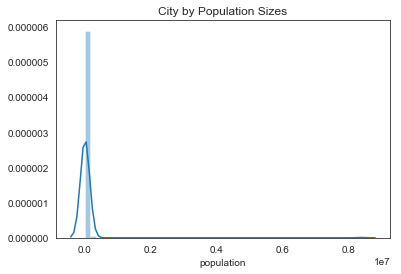

In [11]:
# Look at our data thusfar
sns.distplot(df['population'])
plt.title("City by Population Sizes")
plt.show()

In [21]:
# Find the most egregious outliers. The average population is 40037.632, find outside of 3 std
# That number is a population above 1,390,148

df[(df["population"] > 1390148.0)][
    ["population", "murder", "robbery"]]

,population,murder,robbery
City,,,
New York,8396126.000,335.000,19170.000


In [22]:
# NYC is outside of 3 standard deviations. We'll save the info for in case we need it later, but remove it from our 
# set for general analysis 

nyc = df.loc['New York']
df = df.drop(['New York'], axis='rows')

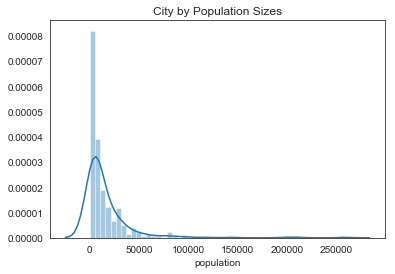

In [23]:
sns.distplot(df['population'])
plt.title("City by Population Sizes")
plt.show()

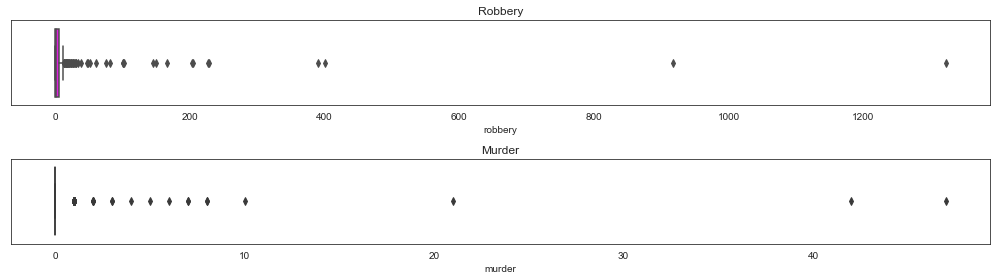

In [27]:
# Now let's look for outliers in the rows we'll need: murder and robbery

robbery = df['robbery']
murder = df['murder']

fig, axes = plt.subplots(2, 1, sharex=False, figsize=(14,4))
# Robbery plot
sns.boxplot(robbery, ax=axes[0], color='fuchsia').set_title('Robbery')    
# Murder plot
sns.boxplot(murder, ax=axes[1], color='m').set_title('Murder')
    
plt.tight_layout()
plt.show()

In [29]:
# The remaining very-populous cities have higher rates of crime than normal cities
# For now, we'll windsorize the data to get rid of extreme outliers

# Windosirze to remove extreme outliers
df['robbery_wins'] = scipy.stats.mstats.winsorize(df['robbery'], limits= 0.02)
df['murder_wins'] = scipy.stats.mstats.winsorize(df['murder'], limits= 0.001)

In [30]:
df.head()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,robbery_wins,murder_wins
City,,,,,,,,,,,,,
Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,0.000,0.000
Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,0.000,0.000
Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,0.000,0.000
Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000,204.000,8.000
Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000,4.000,0.000


In [35]:
# Make our features according to the assignment

features = pd.DataFrame(df["population"])
features["pop_squared"] = df["population"] ** 2
features["robbery"] = np.where((df["robbery"] > 0), 1, 0)
features["murder"] = np.where((df["murder"] > 0), 1, 0)

In [36]:
features.head()

,population,pop_squared,robbery,murder
City,,,,
Adams Village,1861.000,3463321.000,0,0
Addison Town and Village,2577.000,6640929.000,0,0
Akron Village,2846.000,8099716.000,0,0
Albany,97956.000,9595377936.000,1,1
Albion Village,6388.000,40806544.000,1,0


$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$